# Loan Repayment Prediction

In [1]:
import numpy as np
import pandas as pd
from typing import List

import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
import seaborn as sns

In [2]:
# load the data
data = pd.read_csv('./data/training.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# calculate the percentage of missing values
(data.isna().sum() / len(data)).mul(100).sort_values(ascending=False)

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_Status          0.000000
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
Loan_ID              0.000000
dtype: float64

* The data has missing values.

In [5]:
# Descriptive statistics
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Univariate Analysis

In [6]:
data1 = data.copy()

# drop the Loan_ID
data1 = data1.drop(columns=['Loan_ID'])

# split the features into categorical and numerical features
cat_cols = data1.select_dtypes(include='object').columns.to_list()
num_cols = data1.select_dtypes(exclude='object').columns.to_list()

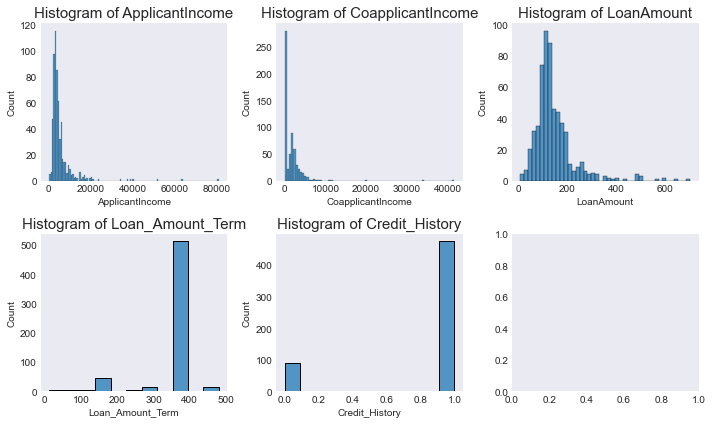

In [7]:
# Distribution plot
n_rows, n_cols = 2, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows * 5, n_cols * 2))

for idx, col in enumerate(num_cols):
    ax = axs[(idx // n_cols), (idx % n_cols)]
    sns.histplot(x=col, data=data1, ax=ax)
    ax.set_title(f"Histogram of {col}", size=15)
    
fig.tight_layout()
plt.show()

* The features do not follow a Normal distribution.
* `Loan_Amount_Term` and `Credit_History` are categorical features.

In [8]:
# data1['Loan_Amount_Term'].unique()

In [9]:
data1['Gender'].value_counts(normalize=True).mul(100)

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

In [10]:
data1['Self_Employed'].value_counts(normalize=True).mul(100)

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

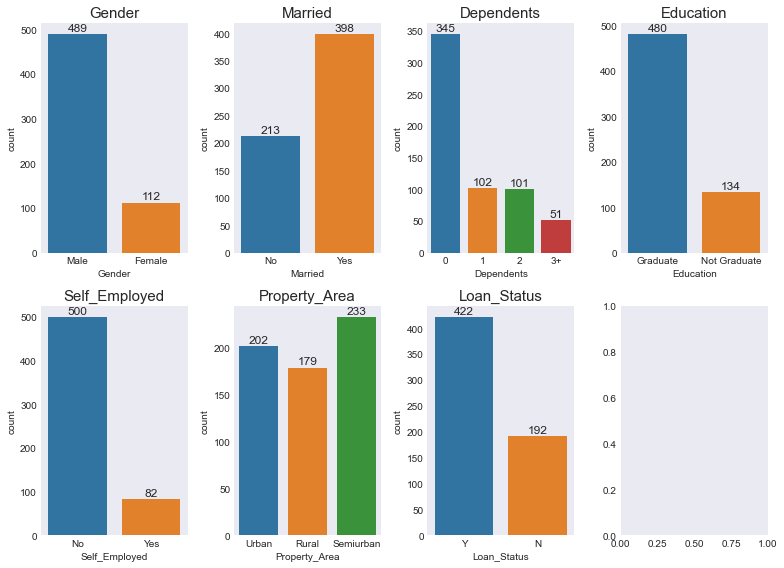

In [11]:
# Distribution plot
n_rows, n_cols = 2, 4
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows * 5.5, n_cols * 2))

for idx, col in enumerate(cat_cols):
    ax = axs[(idx // n_cols), (idx % n_cols)]
    sns.countplot(x=col, data=data1, ax=ax)
    ax.set_title(f"{col}", size=15)

    for bar in ax.patches:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.annotate(text=y,                             # text pos
                    xy=(x, y),                          # (x, y)
                    xytext=(0, 6),                      # text position
                    ha='center',                        # horizontal alignment
                    va='center',                        # vertical alignment
                    size=12,                            # text size
                    textcoords='offset points')         # text coordinates???
    
fig.tight_layout()
plt.show()

* Most of the loan applicants are males (**81%**).
* Most of the loan applicants are also not self employed (**~86%**).

#### Multivariate Analysis
**Frequency Tables**

In [12]:
### Freq tables
# for col in cat_cols:
#     val = pd.crosstab(index=data1['Loan_Status'], columns=data1[col], normalize='columns').mul(100)
#     print(f"{col}==> \n{val} \n")
#     print('===' * 30)

In [13]:
pd.crosstab(index=data1['Loan_Status'], columns=data1['Married'], normalize='columns').mul(100)

Married,No,Yes
Loan_Status,,
N,37.089202,28.39196
Y,62.910798,71.60804


In [14]:
pd.crosstab(index=data1['Loan_Status'], columns=data1['Education'], normalize='columns').mul(100)

Education,Graduate,Not Graduate
Loan_Status,,
N,29.166667,38.80597
Y,70.833333,61.19403


In [15]:
pd.crosstab(index=data1['Loan_Status'], columns=data1['Property_Area'], normalize='columns').mul(100)

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,38.547486,23.175966,34.158416
Y,61.452514,76.824034,65.841584


In [16]:
pd.crosstab(index=data1['Loan_Status'], columns=data1['Credit_History'], normalize='columns').mul(100)

Credit_History,0.0,1.0
Loan_Status,,
N,92.134831,20.421053
Y,7.865169,79.578947


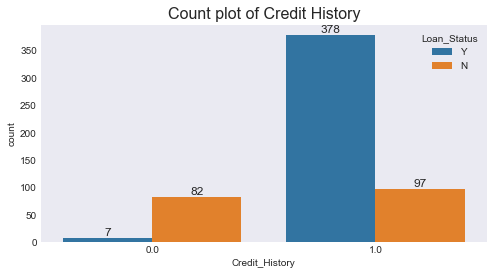

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=data1)
ax.set_title('Count plot of Credit History', size=16)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(text=y,                             # text pos
                xy=(x, y),                          # (x, y)
                xytext=(0, 6),                      # text position
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                size=12,                            # text size
                textcoords='offset points')       
plt.show()

* An applicant without `Credit_History` stands almost no chance (**~8%**) of getting their loan application approved.
* It appears that loan applicants that are `Married`, `Graduates` stand a greater chance of getting their loan application approved.
* It also seems that loan applicants that have their property in `Rural` areas stand a slightly lower chance of getting their loan application approved.

### Impute missing values

In [18]:
data2 = data1.copy()

# impute with the median value
for col in ['Loan_Amount_Term' , 'LoanAmount', 'Credit_History']:
    mean = data2[col].median()
    data2[col] = np.where(pd.isna(data2[col]), mean, data2[col])

# impute the features with the highest occuring value
for col in ['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']:
    mode = data2[col].mode().values[0]
    data2[col] = np.where(pd.isna(data2[col]), mode, data2[col])
    
    
# # verify
# (data2.isna().sum() / len(data2)).mul(100).sort_values(ascending=False)

In [19]:
# split the features into categorical and numerical features
cat_cols = data2.select_dtypes(include='object').columns.to_list()
num_cols = data2.select_dtypes(exclude='object').columns.to_list()

* Transform the numerical features

In [20]:
def cal_outliers(value: str, df: pd.DataFrame) -> List:
    """
    ====================================================================
    Calculate the range of values that are not outliers.
    """    
    
    q1 = np.percentile(df[value], 25)  # 1st quartile
    q3 = np.percentile(df[value], 75)  # 3rd quartile
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    val_range = [lower, upper]
    
    return val_range

In [21]:
data3 = data2.copy()

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    outliers = cal_outliers(col, data3)
    # filter out outliers
    data3 = data3.loc[(data3[col] > outliers[0]) & (data3[col] < outliers[1])]
    
data3    

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


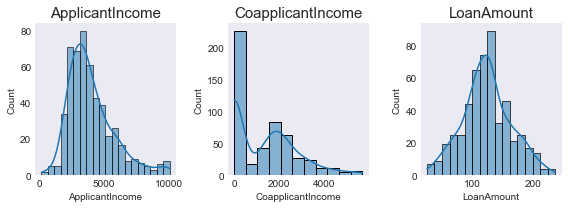

In [22]:
# Distribution plot
n_rows, n_cols = 1, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8, 3))

for idx, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']):
    ax = axs[idx]
    sns.histplot(x=col, data=data3, kde=True, ax=ax)
    ax.set_title(f"{col}", size=15)
    
fig.tight_layout()
plt.show()

### Preprocess the data
* Encode the categorical features

In [23]:
from sklearn.preprocessing import LabelEncoder
data4 = data3.copy()

le_gender = LabelEncoder()
le_married = LabelEncoder()
le_dep = LabelEncoder()
le_edu = LabelEncoder()
le_self_emp = LabelEncoder()
le_pr_ar = LabelEncoder()

encoders = [le_gender, le_married, le_dep, le_edu, le_self_emp, le_pr_ar]
# encoders

In [24]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [25]:
# encode the target
data4['Loan_Status'] = data4['Loan_Status'].map({'Y': 1, 'N': 0})

# encode other columns
for enc, col in zip(encoders, cat_cols):
    data4[col] = enc.fit_transform(data4[col])

data4.head(3)    

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


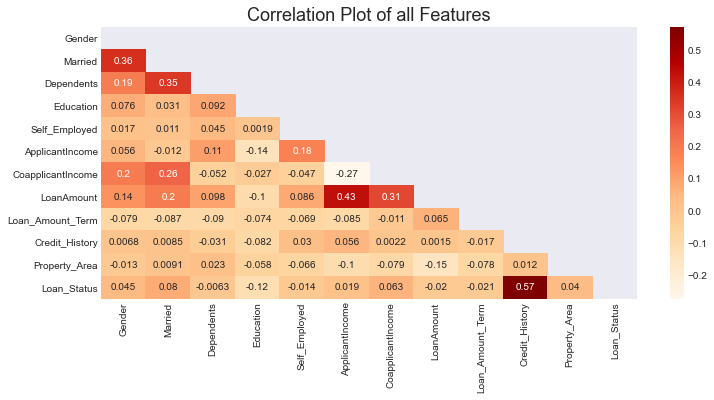

In [26]:
### Correlation Plot
plt.figure(figsize=(12, 5))

corr_matrix = data4.corr()
mask = np.triu(corr_matrix)
sns.heatmap(data=corr_matrix, mask=mask, annot=True, cmap='OrRd')
plt.title('Correlation Plot of all Features', size=18)

plt.show()

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [28]:
X = data4.drop(columns=['Loan_Status'])
y = data4['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [29]:
models = {
    'rf_model': RandomForestClassifier(random_state=123),
    'ada_boost': AdaBoostClassifier(random_state=123),
    }

for name, estimator in models.items():
    # fit 
    estimator.fit(X_train, y_train)
    
    # make predictions
    y_pred = estimator.predict(X_test)
    
    # make predictions
    pred = estimator.predict(X_test)
    clf_report = classification_report(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    
    print(f"Estimator: {name}: \n Classification Report: \n{clf_report} \nConfusion Matrix: \n{conf_matrix} \n")
    print("==" * 30)


Estimator: rf_model: 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        24
           1       0.86      0.93      0.89        80

    accuracy                           0.83       104
   macro avg       0.76      0.71      0.73       104
weighted avg       0.82      0.83      0.82       104
 
Confusion Matrix: 
[[12 12]
 [ 6 74]] 

Estimator: ada_boost: 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        24
           1       0.86      0.95      0.90        80

    accuracy                           0.85       104
   macro avg       0.81      0.72      0.75       104
weighted avg       0.84      0.85      0.83       104
 
Confusion Matrix: 
[[12 12]
 [ 4 76]] 



In [30]:
rf_param = {"n_estimators" : [30, 50, 70, 90, 100, 110],
             "max_depth" : [2 ,4, 6 ,8, 10, 12, 14, 16, 18, 20, None]}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=rf_param, cv=5, verbose=2, n_jobs=-1, scoring='f1')

In [31]:
# train
rf_grid.fit(X_train, y_train)

rf_grid.best_params_

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   44.6s finished


{'max_depth': 2, 'n_estimators': 50}

In [32]:
clf = rf_grid.best_estimator_
y_pred = clf.predict(X_test)

# make predictions
pred = clf.predict(X_test)
clf_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)

print(f"Estimator: clf ==> \n Classification Report: \n{clf_report} \nConfusion Matrix: \n{conf_matrix} \n")
print("==" * 30)

Estimator: clf ==> 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.46      0.59        24
           1       0.86      0.97      0.91        80

    accuracy                           0.86       104
   macro avg       0.85      0.72      0.75       104
weighted avg       0.85      0.86      0.84       104
 
Confusion Matrix: 
[[11 13]
 [ 2 78]] 



In [33]:
# Feature importance
feat_imp = pd.Series(data=clf.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False).reset_index()
feat_imp.columns = ['Features', 'Weights']
feat_imp

,Features,Weights
0,Credit_History,0.405799
1,CoapplicantIncome,0.134954
2,Loan_Amount_Term,0.111556
3,LoanAmount,0.099257
4,Property_Area,0.095868
5,ApplicantIncome,0.071844
6,Education,0.051084
7,Dependents,0.012439
8,Married,0.009088
9,Gender,0.008109


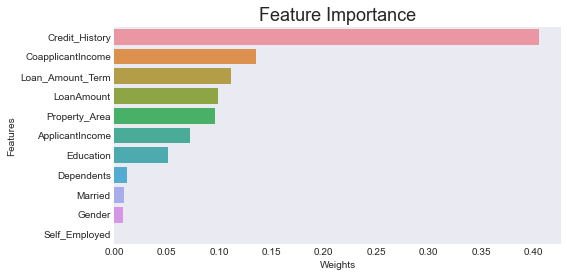

In [34]:
plt.figure(figsize=(8, 4))
sns.barplot(y='Features', x='Weights', data=feat_imp)
plt.title('Feature Importance', size=18)

plt.show()

* It can be clearly seen that `Credit_History`, `CoapplicantIncome` and `Loan_Amount_Term` are the most important features.

### Make predictions on new data

In [35]:
# Gender Married Dependents Education Self_Employed ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History Property_Area
new_data = [['Female', 'No', 2, 'Graduate', 'No', 6500, 0, 400, 240, 1, 'Rural']]
new_data = np.array(new_data)

new_data

array([['Female', 'No', '2', 'Graduate', 'No', '6500', '0', '400', '240',
        '1', 'Rural']], dtype='<U8')

In [36]:
# encode the categorical features
new_data[:, 0] = le_gender.transform(new_data[:, 0])
new_data[:, 1] = le_married.transform(new_data[:, 1])
new_data[:, 2] = le_dep.transform(new_data[:, 2])
new_data[:, 3] = le_edu.transform(new_data[:, 3])
new_data[:, 4] = le_self_emp.transform(new_data[:, 4])
new_data[:, 10] = le_pr_ar.transform(new_data[:, 10])

new_data

array([['0', '0', '2', '0', '0', '6500', '0', '400', '240', '1', '0']],
      dtype='<U8')

In [37]:
# make predictions
pred = clf.predict(new_data)

final_pred = 'Yes' if pred[0] == 1 else 'No'
final_pred

'Yes'

### Save and load the model

In [38]:
# add the model and encoders to a dictionary
estimator = {}
estimator['clf'] = clf
estimator['le_gender'] = le_gender
estimator['le_married'] = le_married
estimator['le_dep'] = le_dep
estimator['le_edu'] = le_edu
estimator['le_self_emp'] = le_self_emp
estimator['le_pr_ar'] = le_pr_ar

In [39]:
import pickle

# save model
with open('./model/estimator.pkl', 'wb') as f:
    pickle.dump(estimator, f)

In [40]:
# load the model
with open('./model/estimator.pkl', 'rb') as f:
    loaded_estimators = pickle.load(f)

In [41]:
# make predictions
loaded_model = loaded_estimators['clf']
pred = loaded_model.predict(new_data)

final_pred = 'Yes' if pred[0] == 1 else 'No'
final_pred

'Yes'

In [42]:
estimator

{'clf': RandomForestClassifier(max_depth=2, n_estimators=50, random_state=123),
 'le_gender': LabelEncoder(),
 'le_married': LabelEncoder(),
 'le_dep': LabelEncoder(),
 'le_edu': LabelEncoder(),
 'le_self_emp': LabelEncoder(),
 'le_pr_ar': LabelEncoder()}